# Import packages

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import io

# Target File

In [1]:
NFS_bose_f = 'NFS_bose.txt'
NFS_CEA_f = 'NFS_CEA2034.txt'

# Furnish Functions

### Define Curve Object

In [3]:
class curveData:
    def __init__(self, label, note, xdata, ydata):
        self.label = label
        self.note = note
        self.xdata = xdata
        self.ydata = ydata

### Graph Style

In [4]:
x_lim = [20,20000]
y_lim = [0, 30]


def setStyle(myPlotDict):
    for key in myPlotDict.keys():
        ax = myPlotDict[key]
        ax.set_xscale('log')
        ax.set_xlim(auto=True)
        ax.set_ylim(auto=True)
        ax.grid()
        ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

def setAxStyle(ax):
    ax.set_xscale('log')
    ax.set_xlim(auto=True)
    ax.set_ylim(auto=True)
    ax.grid()
    ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

In [52]:
dataSequence = {}

def get_NFS_file(path):
    with open(path, 'r', encoding='UTF-8') as file:
        file_dir = path
        filename = path[file_dir.rfind('/')+1:file_dir.rfind('.')]         

        headers = file.readlines()[:3]
        title = headers[0].strip().strip('"')
        labels = headers[1].split('\t\t')
        labels = [c.replace('"', '').strip() for c in labels]

        if title in dataSequence: pass
        else: dataSequence[title] = []
            
        data = pd.read_table(path,  skiprows=2)
        data = data.dropna() 
        curveDatas = []
        note = ""
        
        freq = data.iloc[:, 0]
        freq = [float(f.replace(',', '').strip()) for f in freq]
        freq = pd.Series(freq, name='y', dtype=float)
        
        for i in range(int(len(data.columns)/2)):
            spl = pd.Series(data.iloc[:, i*2+1], name='y', dtype=float)
            curveDatas.append(curveData(labels[i], note, freq, spl))
        dataSequence[title].extend(curveDatas)


get_NFS_file(NFS_CEA_f)


In [40]:
def plot(dataSequence):
    for title, cruvesArr in dataSequence.items():
        fig.add_subplot(111)
        myPlotDict[title] = fig.axes[len(fig.axes) - 1]
        for it in cruvesArr:
            if (it.xdata.dtype == float):
                print(title)  
                myPlotDict[title].plot(it.xdata, it.ydata, label=it.label)
    setStyle(myPlotDict)

def plotOne(dataSequence, title, ax):
    for it in dataSequence[title]:
        if (it.xdata.dtype == float):
            ax.plot(it.xdata, it.ydata, label=it.label)
    setAxStyle(ax)

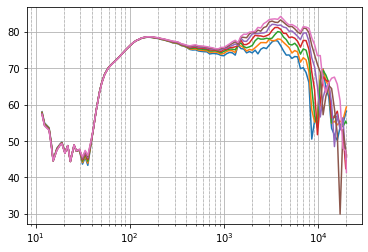

In [41]:
fig_spl, _ = plt.subplots()
get_NFS_file(NFS_bose_f)
plotOne(dataSequence, "SPL Vertical", fig_spl.axes[0])

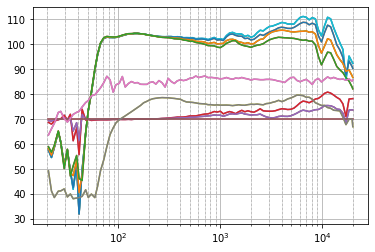

In [53]:
fig_cea, _ = plt.subplots()
get_NFS_file(NFS_CEA_f)
plotOne(dataSequence, "CEA2034", fig_cea.axes[0])
